# **Supervised Learning: Linear Regression**

In [ ]:
#read in the data file:
library(readr)
company <- read_csv("https://raw.githubusercontent.com/CalColistra/IDS/main/Project5/company_data.csv", show_col_types = FALSE)
head(company, 10)

TV,Radio,Newspaper,Sales
<dbl>,<dbl>,<dbl>,<dbl>
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,12.0
151.5,41.3,58.5,16.5
180.8,10.8,58.4,17.9
8.7,48.9,75.0,7.2
57.5,32.8,23.5,11.8
120.2,19.6,11.6,13.2
8.6,2.1,1.0,4.8


In [ ]:
#describe the company dataframe:
dim(company)
summary(company)

[1] 200   4

       TV             Radio          Newspaper          Sales      
 Min.   :  0.70   Min.   : 0.000   Min.   :  0.30   Min.   : 1.60  
 1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75   1st Qu.:11.00  
 Median :149.75   Median :22.900   Median : 25.75   Median :16.00  
 Mean   :147.04   Mean   :23.264   Mean   : 30.55   Mean   :15.13  
 3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10   3rd Qu.:19.05  
 Max.   :296.40   Max.   :49.600   Max.   :114.00   Max.   :27.00  

# **Examine Correlations:**

In [ ]:
correlations <- cor(company)
correlations

,TV,Radio,Newspaper,Sales
TV,1.00000000,0.05480866,0.05664787,0.9012079
Radio,0.05480866,1.00000000,0.35410375,0.3496311
Newspaper,0.05664787,0.35410375,1.00000000,0.1579600
Sales,0.90120791,0.34963110,0.15796003,1.0000000


# **Examine Features with Boxplots**

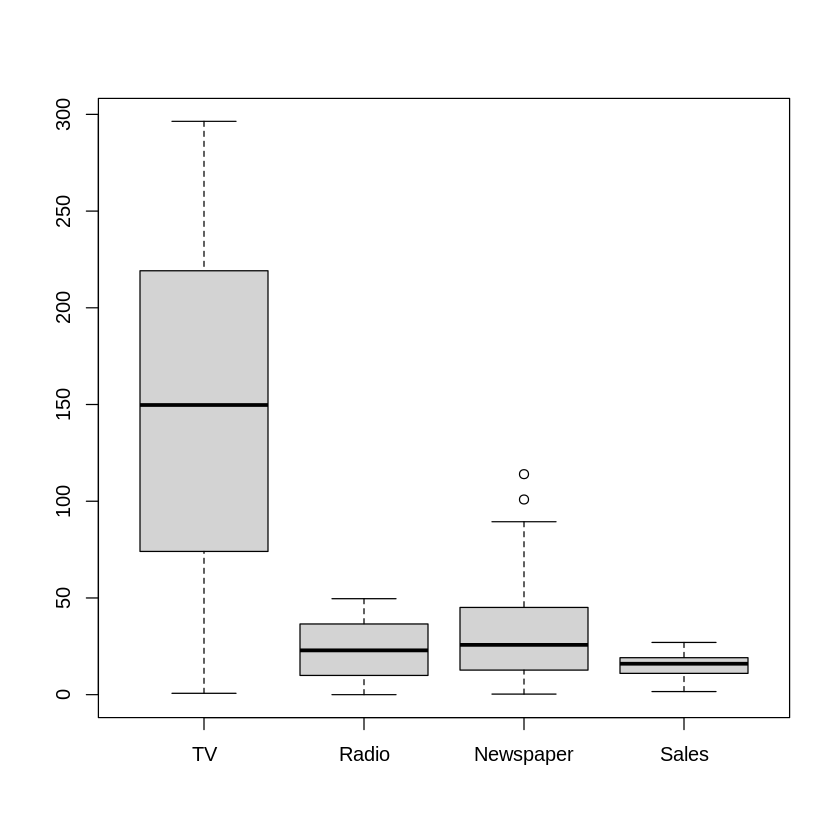

In [ ]:
boxplot(company)

# **Examine Feature Distributions**

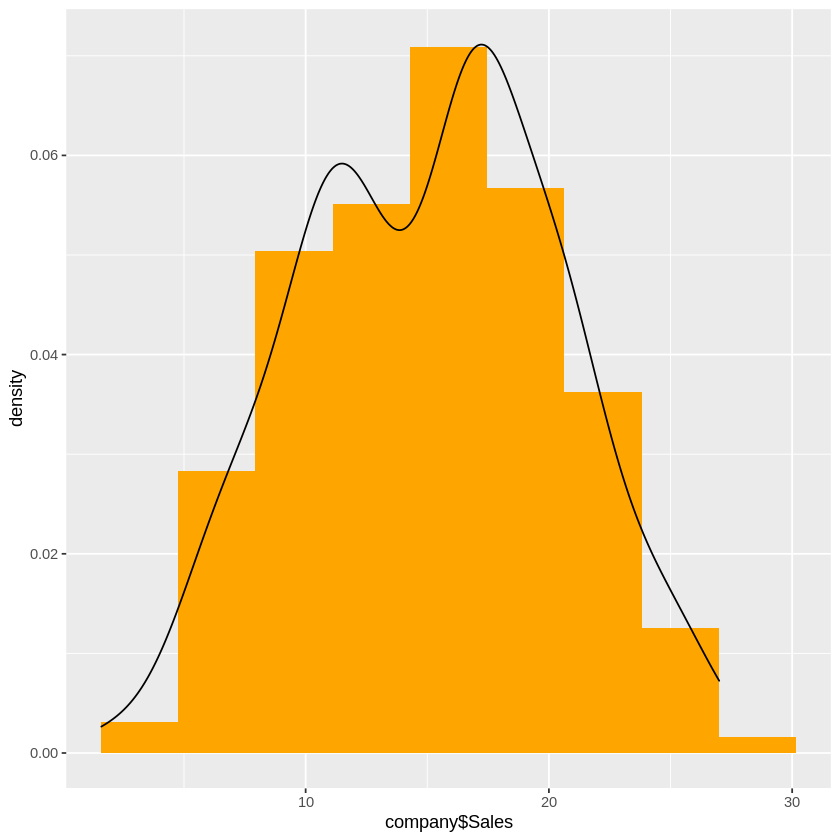

In [ ]:
library(ggplot2)
# Building histogram
ggplot(data=company, aes(company$Sales)) +
  geom_histogram(aes(y =..density..), fill = "orange", bins = 9) +
  geom_density()

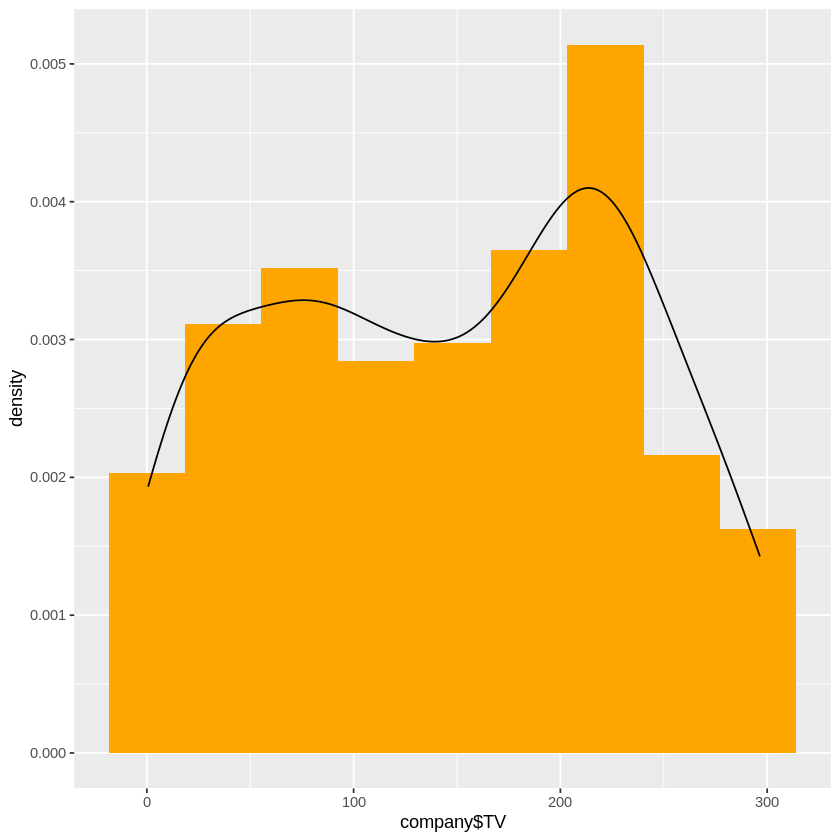

In [ ]:
ggplot(data=company, aes(company$TV)) +
  geom_histogram(aes(y =..density..), fill = "orange", bins = 9) +
  geom_density()

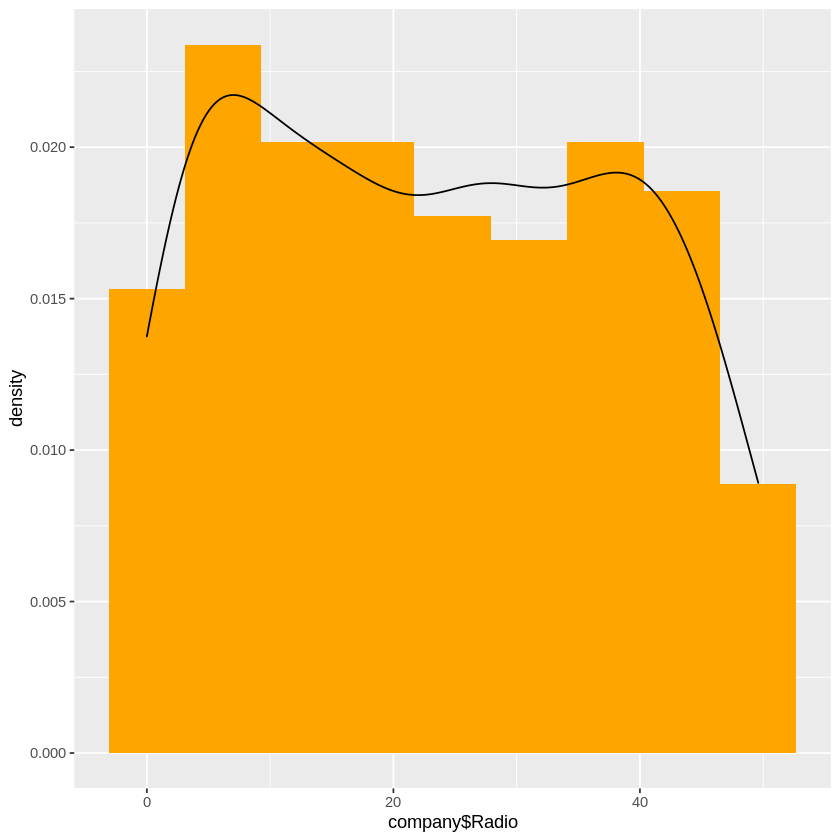

In [ ]:
ggplot(data=company, aes(company$Radio)) +
  geom_histogram(aes(y =..density..), fill = "orange", bins = 9) +
  geom_density()

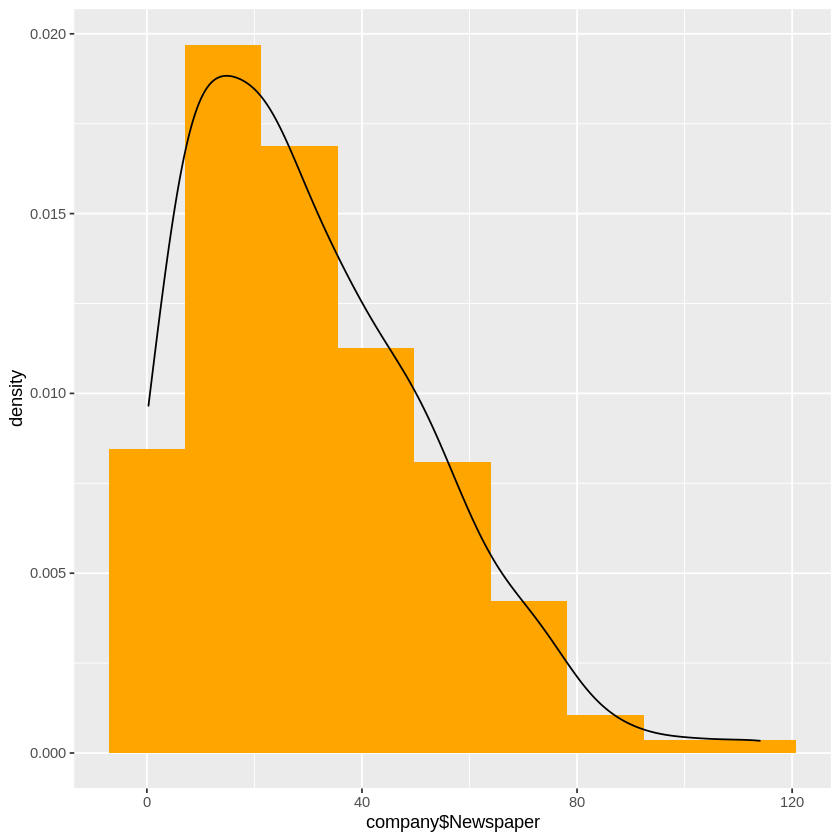

In [ ]:
ggplot(data=company, aes(company$Newspaper)) +
  geom_histogram(aes(y =..density..), fill = "orange", bins = 9) +
  geom_density()

## **Check for Missing Values**

In [ ]:
cbind(
   lapply(lapply(company, is.na),sum)
     )

TV,0
Radio,0
Newspaper,0
Sales,0


## **Bulid the Linear Regression Model**

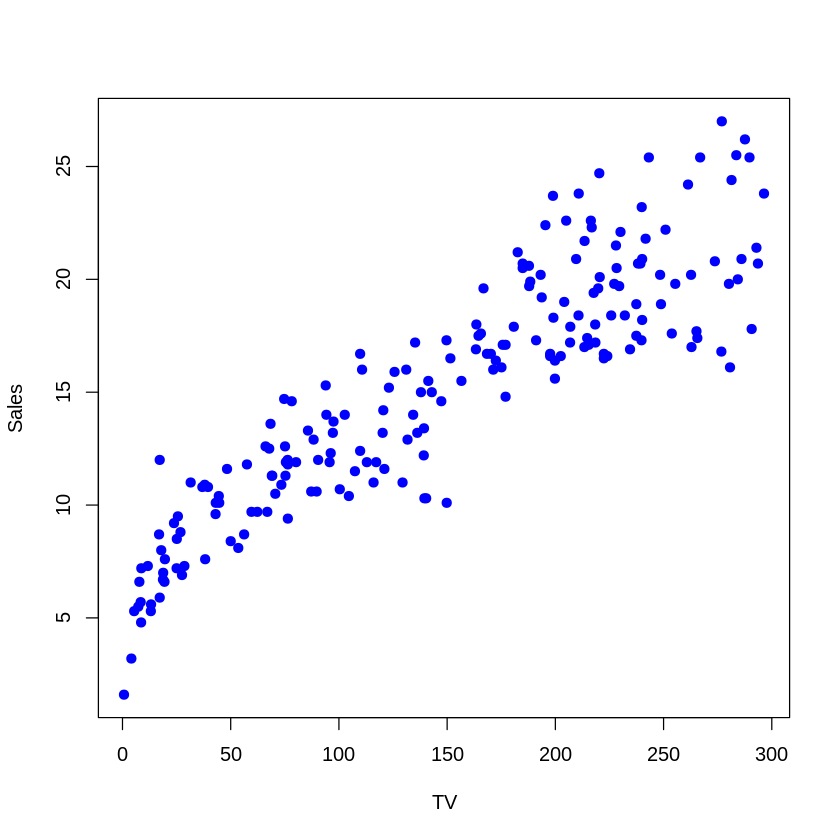

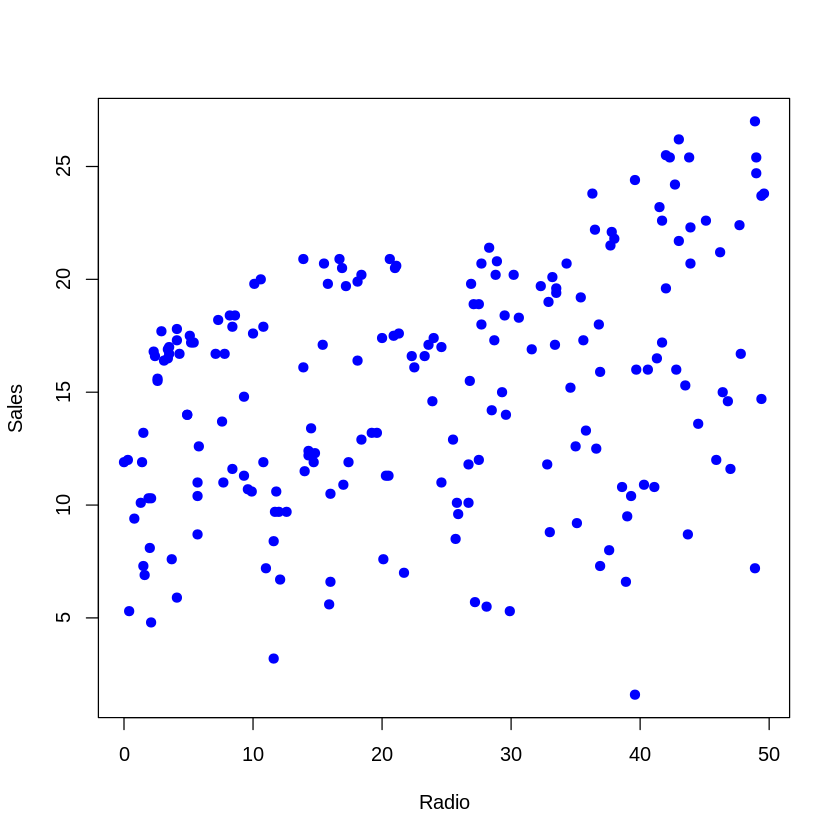

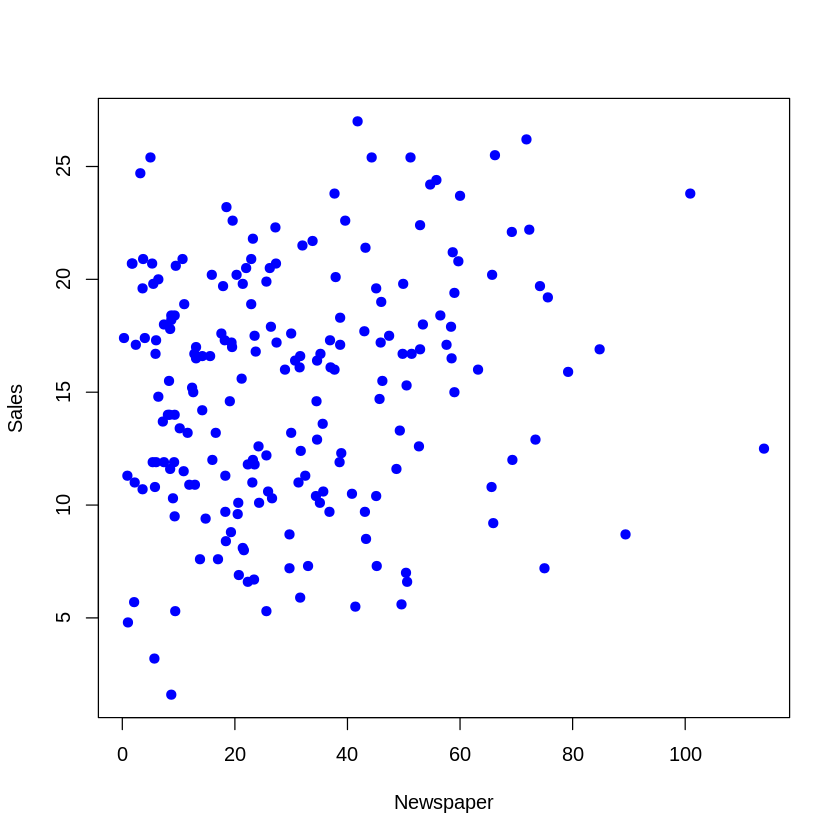

In [ ]:
TV <- company$TV
Radio <- company$Radio
Newspaper <- company$Newspaper
Sales <- company$Sales
plot(TV, Sales, pch = 19, col = "blue")
plot(Radio, Sales, pch = 19, col = "blue")
plot(Newspaper, Sales, pch = 19, col = "blue")

## **Use the Entire Data Set for Training**

In [ ]:
#make & print the linear regression model between sales and TV
sales_tv <- lm(Sales ~ TV, data=company)
print(sales_tv)

modelSum <- summary(sales_tv)
print("MSE:") 
MSE_tv <- mean(modelSum$residuals^2)
MSE_tv
print("R2 score:")
r_tv <- modelSum$r.squared
r_tv


Call:
lm(formula = Sales ~ TV, data = company)

Coefficients:
(Intercept)           TV  
    6.97482      0.05546  

[1] "MSE:"


[1] 5.217744

[1] "R2 score:"


[1] 0.8121757

### **Linear Model**: Sales = 6.97 + 0.05 * TV

## **Split the Data into Training and Test Cases**

In [ ]:
install.packages("caret")
library(caret)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [ ]:
# Create Training and Test data -
set.seed(100)  # setting seed to reproduce results of random sampling
index <- sample(1:nrow(company), 0.8*nrow(company))  # row indices for training data
trainingData <- company[index, ]  # model training data
testData  <- company[-index, ]   # test data
#check dimensions of train & test:
dim(trainingData)
dim(testData)

[1] 160   4

[1] 40  4

In [ ]:
# Build the model on training data
lmMod <- lm(Sales ~ TV, data=trainingData)  # build the model
print(lmMod)

print('MSE between test data and prediction data of Sales:')
mean((testData$Sales - predict.lm(lmMod, testData)) ^ 2)  #calculate MSE

#predict with the training model and the test data
preds <- predict.lm(lmMod, testData)
actual <- testData$Sales

rs <- sum((preds - actual)^2)  #resdual sum of squares
ts <- sum((actual - mean(actual))^2)  #total sum of squares
rsq <- 1 - (rs/ts)  #calculate r squared:
print('R squared between test data and prediction data of Sales:')
rsq


Call:
lm(formula = Sales ~ TV, data = trainingData)

Coefficients:
(Intercept)           TV  
    7.03794      0.05478  

[1] "MSE between test data and prediction data of Sales:"


[1] 6.15252

[1] "R squared between test data and prediction data of Sales:"


[1] 0.7924888

## **Linear Model:** Sales = 7.03 + 0.05 * TV

## **Summary**

* Model trained and tested on the entire data set of 200 cases: 
> **Sales = 6.97 + 0.05 * TV**    

* Model trained on 70% of the data and tested on 30% of the data: 
> **Sales = 7.03 + 0.05 * TV**

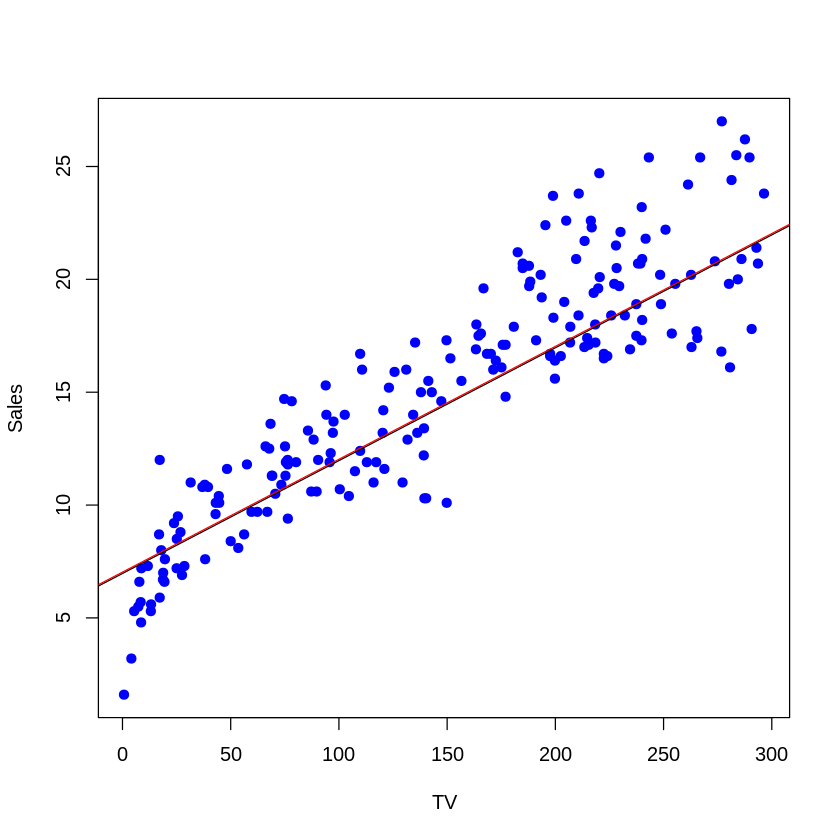

In [ ]:
plot(TV, Sales, pch = 19, col = "blue")

abline(6.97, 0.05, col = "black")
abline(7.03, 0.05, col = "red")

# **Build the following linear models and plot the obtained MSE and R2 values for each model:**
-Sales vs. TV

-Sales vs. Radio

-Sales vs. Newspaper

In [ ]:
#make lm model between sales and Radio
sales_radio <- lm(Sales ~ Radio, data=company)
print(sales_radio)

modelSum <- summary(sales_radio)
MSE_radio <- mean(modelSum$residuals^2)
r_radio <- modelSum$r.squared


Call:
lm(formula = Sales ~ Radio, data = company)

Coefficients:
(Intercept)        Radio  
    12.2357       0.1244  



In [ ]:
#make lm model between sales and Newspaper
sales_newspaper <- lm(Sales ~ Newspaper, data=company)
print(sales_newspaper)

modelSum <- summary(sales_newspaper)
MSE_newspaper <- mean(modelSum$residuals^2)
r_newspaper <- modelSum$r.squared


Call:
lm(formula = Sales ~ Newspaper, data = company)

Coefficients:
(Intercept)    Newspaper  
   13.95955      0.03832  



,MSEs,Rscores
,<dbl>,<dbl>
TV,5.217744,0.81217570
Radio,24.384049,0.12224190
Newspaper,27.086773,0.02495137


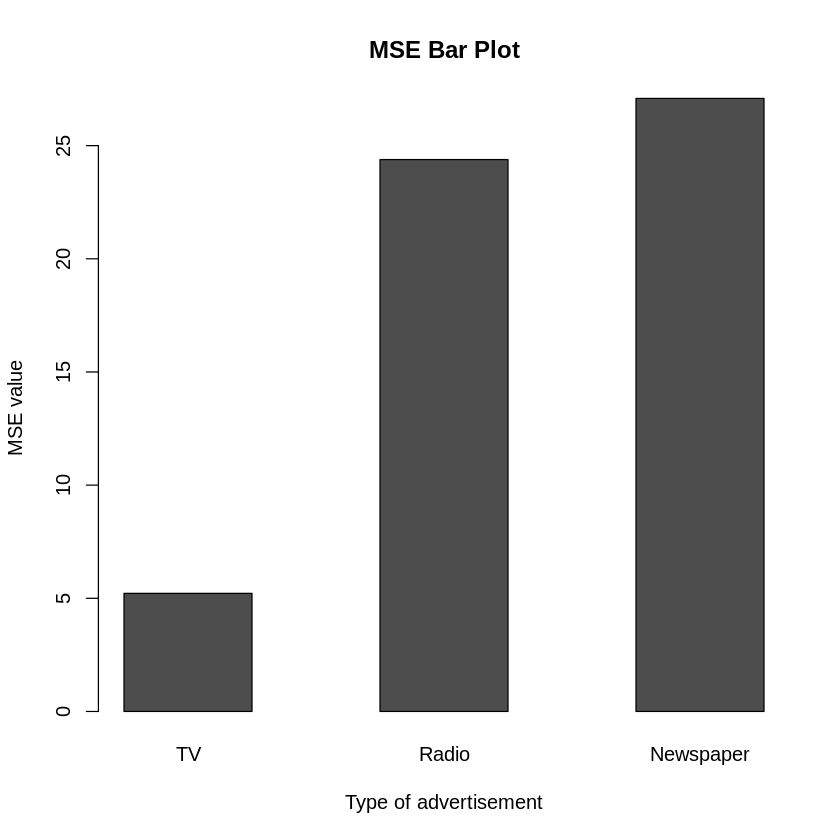

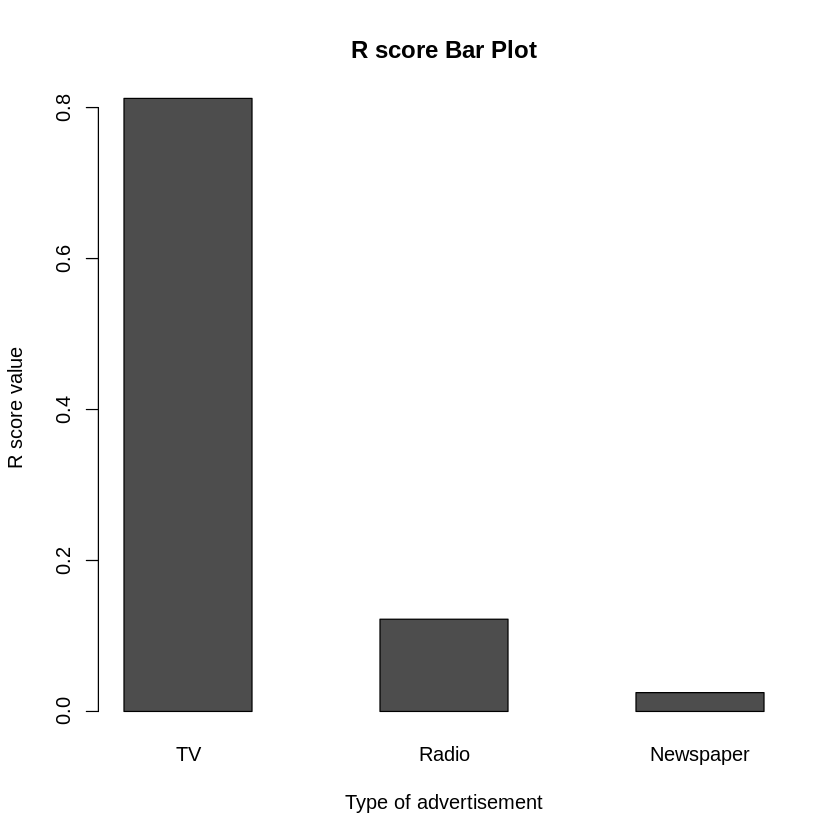

In [ ]:
#make a dataframe with the MSE and R scores of each:
MSEs <- c(MSE_tv, MSE_radio, MSE_newspaper)
Rscores <- c(r_tv, r_radio, r_newspaper)
df <- data.frame(MSEs, Rscores)
# changing row names of data frame
rownames(df) <- c("TV","Radio","Newspaper")
df
barplot(t(as.matrix(df$MSEs)), main = "MSE Bar Plot", xlab = "Type of advertisement", ylab = "MSE value", names.arg=c("TV","Radio","Newspaper"), beside=TRUE)
barplot(t(as.matrix(df$Rscores)), main = "R score Bar Plot", xlab = "Type of advertisement", ylab = "R score value", names.arg=c("TV","Radio","Newspaper") ,beside=TRUE)



# **Summary:**
To find which type of advertisement had the biggest impact on number of sales I look for the one with the highest R score and the lowest MSE which is clearly TV.  

This makes sense because now a days there are much more people who watch TV instead of reading newspaper or listening to the radio.  For this reason, the advertisements are much more succesful when on TV.

# **Recources:**


*   http://www.sthda.com/english/wiki/correlation-matrix-a-quick-start-guide-to-analyze-format-and-visualize-a-correlation-matrix-using-r-software
*   https://datacornering.com/check-if-a-column-has-a-missing-values-na-in-r/
*   https://r-coder.com/scatter-plot-r/#:~:text=You%20can%20create%20a%20scatter,matrix%2C%20with%20the%20pairs%20function.&text=In%20addition%2C%20in%20case%20your,the%20groups%20with%20different%20color.
*   https://www.statology.org/r-squared-in-r/
*   https://www.r-bloggers.com/2020/05/step-by-step-guide-on-how-to-build-linear-regression-in-r-with-code/
*   https://www.statology.org/how-to-calculate-mse-in-r/
*   https://www.guru99.com/r-data-frames.html
*   http://www.sthda.com/english/wiki/add-titles-to-a-plot-in-r-software
*   https://www.geeksforgeeks.org/how-to-change-row-names-of-dataframe-in-r/










